# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [22]:
spotify_df = pd.read_csv('spotify.csv', index_col=0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [23]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [24]:
len(df_train)

1512

In [25]:
len(df_test)

505

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [26]:
training_summary = df_train.describe()
training_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.185337,0.617565,247606.240741,0.682022,0.139041,5.406746,0.189816,-7.089587,0.619048,0.090843,121.978905,3.964947,0.501758,0.511243
std,0.257866,0.163086,81841.143743,0.211498,0.279536,3.635880,0.154115,3.841885,0.485782,0.086574,27.121977,0.253555,0.246599,0.500039
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009460,0.512000,200072.000000,0.564000,0.000000,2.000000,0.092200,-8.389000,0.000000,0.037375,100.500750,4.000000,0.298750,0.000000
50%,0.063700,0.629500,230100.000000,0.713500,0.000076,6.000000,0.127000,-6.239000,1.000000,0.055050,121.974000,4.000000,0.501000,1.000000
75%,0.253000,0.738250,274041.750000,0.847250,0.061100,9.000000,0.243000,-4.756000,1.000000,0.107000,137.938250,4.000000,0.694000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [27]:
(training_summary.loc["max"] - training_summary.loc["min"]).sort_values()

speechiness              0.792900
danceability             0.862000
liveness                 0.950200
valence                  0.956100
instrumentalness         0.976000
energy                   0.982200
acousticness             0.994995
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                32.790000
tempo                  171.472000
duration_ms         833918.000000
dtype: float64

In [28]:
# speechiness feature has the lowest range.

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [29]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

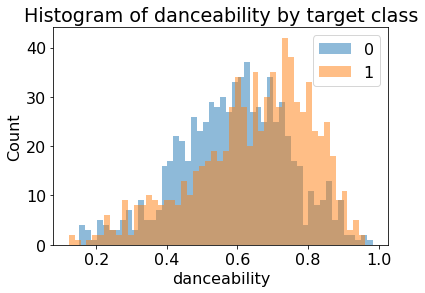

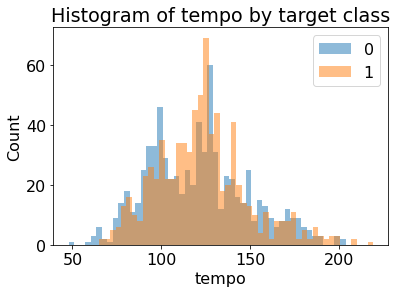

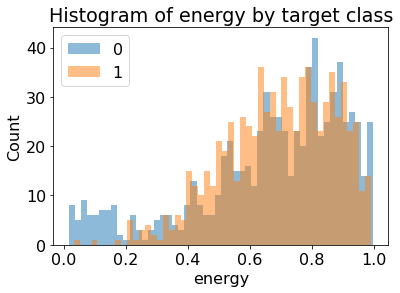

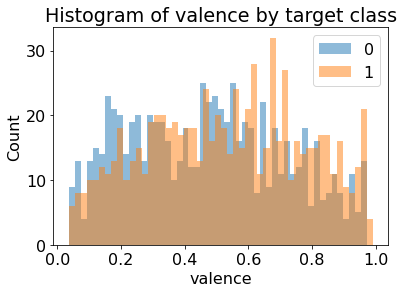

In [30]:
features = ["danceability", "tempo", "energy", "valence"]

for feature in features:
    plt.hist(negative_examples[feature], bins=50, label="0", alpha=0.5)
    plt.hist(positive_examples[feature], bins=50, label="1", alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram of {} by target class".format(feature))
    plt.legend(loc="best")
    plt.show()
    

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

In [31]:
print("From the histogram above, it seems that songs with higher danceability are liked more by people. A reasonable split would be to predict 1 if danceability > 0.7")

From the histogram above, it seems that songs with higher danceability are liked more by people. A reasonable split would be to predict 1 if danceability > 0.7


#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



In [32]:
print("No, the feature could still be useful because the plots above are graphed on a single feature, however, when multiple features are used together, they may present new information, so the feature which is identical for both the target classes couldstill become useful in this case, and can offer information which would help to choose the target class.")

No, the feature could still be useful because the plots above are graphed on a single feature, however, when multiple features are used together, they may present new information, so the feature which is identical for both the target classes couldstill become useful in this case, and can offer information which would help to choose the target class.


#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [33]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

In [34]:
print("These features can be helpful in predicting whether the user liked the song since it can offer information about user's music preference based on what artists or music genre the user listens to more. It is difficult to plot a graph which has many data entries and text used in it instead of numbers.")

These features can be helpful in predicting whether the user liked the song since it can offer information about user's music preference based on what artists or music genre the user listens to more. It is difficult to plot a graph which has many data entries and text used in it instead of numbers.


<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [35]:
X_train = df_train.drop(columns=["target", "song_title", "artist"])
y_train = df_train["target"]

X_test = df_test.drop(columns=["target", "song_title", "artist"])
y_test = df_test["target"]

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [36]:
decision_tree.predict(X_train.iloc[[0]])

array([0])

In [37]:
y_train.iloc[0]

0

In [38]:
print("Yes, the prediction is correct.")

Yes, the prediction is correct.


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [39]:
cross_val_score(decision_tree, X_train, y_train, cv=10).mean()

0.6851951899616592

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [40]:
cv_df = cross_validate(decision_tree, X_train, y_train, cv=10, return_train_score=True)
cv_df["test_score"].mean()

0.6792436388985709

In [41]:
cv_df["train_score"].mean()

0.9994121428880149

In [42]:
print("No, the score is different because of the randomness in the decision tree algorithm.")

No, the score is different because of the randomness in the decision tree algorithm.


#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

In [43]:
print("Yes, the training score is much higher than cross-validation score, which could mean that this model is overfit on the training data.")

Yes, the training score is much higher than cross-validation score, which could mean that this model is overfit on the training data.


#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [44]:
pd.DataFrame(cv_df)

,fit_time,score_time,test_score,train_score
0,0.012034,0.001259,0.664474,0.999265
1,0.010775,0.001064,0.677632,1.000000
2,0.010454,0.001062,0.688742,1.000000
3,0.009990,0.000980,0.668874,0.999265
4,0.009812,0.000987,0.649007,0.999265
5,0.009632,0.000988,0.721854,0.999265
6,0.009881,0.000969,0.675497,0.999265
7,0.010652,0.000987,0.655629,0.999265
8,0.009803,0.000970,0.695364,0.999265
9,0.009854,0.000981,0.695364,0.999265


In [45]:
print("The scores vary from 0.615894 to 0.728477 which is a fairly large range. It can be said that the trustworthiness of the cross validation score cannot be determined using just 2-3 significant figures.")

The scores vary from 0.615894 to 0.728477 which is a fairly large range. It can be said that the trustworthiness of the cross validation score cannot be determined using just 2-3 significant figures.


## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

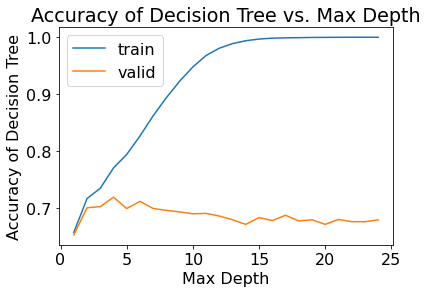

In [46]:
train_scores = [] 
cv_scores = []
max_depth = np.arange(1, 25)

for a in max_depth:
    # Prepare data for model fitting
    decision_tree = DecisionTreeClassifier(max_depth=a)
    cv_df = cross_validate(decision_tree, X_train, y_train, cv=10, return_train_score=True)
    train_score = cv_df["train_score"].mean()
    cv_score = cv_df["test_score"].mean()
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(max_depth, train_scores, label="train")
plt.plot(max_depth, cv_scores, label="valid")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy of Decision Tree")
plt.title("Accuracy of Decision Tree vs. Max Depth");
plt.legend()

In [47]:
optimal_depth = max_depth[np.argmax(cv_scores)]
print("optimal depth: ", optimal_depth)

optimal depth:  4


In [48]:
print("It can be deduced from the plot that or training data, the accuracy of decision tree is higher when max_depth is higher. The model is able to classify with an accuracy of 1.0 when the max_depth is >=15. In contrast, the cross validation scores initially rise as the max_depth increases but then declines as the max_depth value goes above 4. Choosing 4 as the optimal depth would be the best case scenario since the value of cross validation score is highest at that point. For generalizing spotify users, it is vital to know how similar are the users and the max_depth of 4 appears to be the most optimal value to determine.")

It can be deduced from the plot that or training data, the accuracy of decision tree is higher when max_depth is higher. The model is able to classify with an accuracy of 1.0 when the max_depth is >=15. In contrast, the cross validation scores initially rise as the max_depth increases but then declines as the max_depth value goes above 4. Choosing 4 as the optimal depth would be the best case scenario since the value of cross validation score is highest at that point. For generalizing spotify users, it is vital to know how similar are the users and the max_depth of 4 appears to be the most optimal value to determine.


## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [49]:
# Choosing max_depth=4

decision_tree = DecisionTreeClassifier(max_depth=optimal_depth)

decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.7029702970297029

In [50]:
print("The test score value obtained is lower than the cross validation score obtained previously. Hence, we cannot rely too much on it.")

The test score value obtained is lower than the cross validation score obtained previously. Hence, we cannot rely too much on it.


## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

In [51]:
print("1.) Since the first three examples are less than 5.5, we will predict -1 as true case here. For last three examples, +1 would be predicted as the true case.")

1.) Since the first three examples are less than 5.5, we will predict -1 as true case here. For last three examples, +1 would be predicted as the true case.


In [52]:
print("2.) Training accuracy: 5/6")

2.) Training accuracy: 5/6


In [53]:
print("3.) It is not possible to obtain 100% accuracy since it is not possible to split the data by using a single value.")

3.) It is not possible to obtain 100% accuracy since it is not possible to split the data by using a single value.


## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 